# Introduction
In this notebook I am working on the bank marketting dataset which can be found at-https://archive.ics.uci.edu/ml/datasets/bank+marketing.
This is a multivariate dataset with numeric and categorical attributes with a classification problem where we have to predict whether a client has subscribed a deposit or not. There are unknown values in some of the attributes which are described as 999. The whole idea of this notebook is to show how to work around a multivariate dataset.
This process of developing a classification predicting model is done in the following stages-
1. Data introduction
2. Preprocessing of data
3. Data Analysis- 
       3a. Frequency Analysis
4. Imputation of data

# Section 1. Data introduction

In [85]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [86]:
df_full=pd.read_csv('bank-additional-full.csv',delimiter=';')
df_small=pd.read_csv('bank.csv',delimiter=';')
print("Dataset dimension:"+ str(df_full.shape))
print("Dataset contains the following attributes-" + str(df_full.columns))

Dataset dimension:(41188, 21)
Dataset contains the following attributes-Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [87]:
display(df_full.head(10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Discussion
From the above dataframe we can see that age,balance,day,duration,campaign,pdays,previous are all numeric while the others are categorical entries.Therefore, we are dealing with a multivariate dataset with 4521 instances and 17 attributes. The last column y is what we have to predict using our classification model!

# Section 2- Preprocessing of data
From the above data description we can see two things-
1. The duration column is not necessary for us since it doesnt not change the outcome column.It doesnt matter if the call duration is 0 or 1 because we already have the outcome variable figured out. Hence, I will drop this column.
2. There are two other columns that have unknown values,poutcome and contact. We might drop these columns too in future if the number of unknown values are more and hard to take care of.

In [88]:
df_full=df_full.drop(['duration'],axis=1)
print(df_full.shape)

(41188, 20)


In [89]:
display(df_full.head(10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Section 3- Data Analysis
In this section, we will check all the other columns in the dataset to see if there are missing values or not. We will be using the seaborn library to create the plots and visualise them one by one.

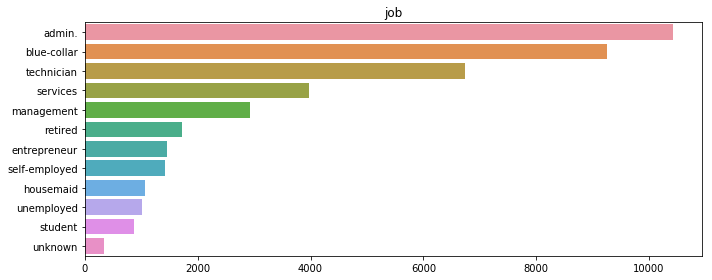

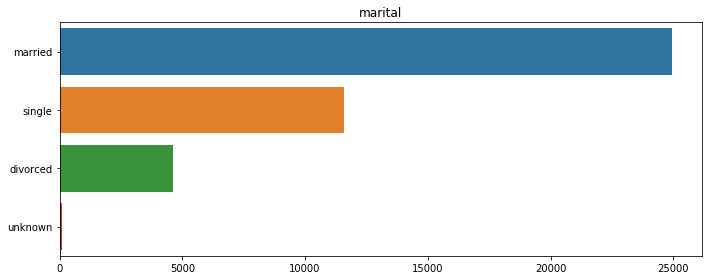

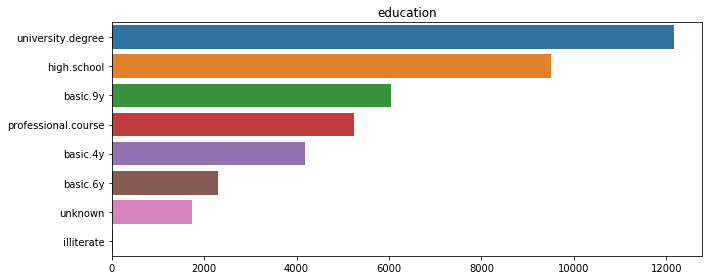

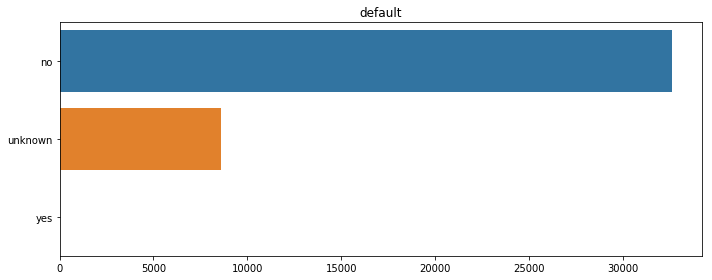

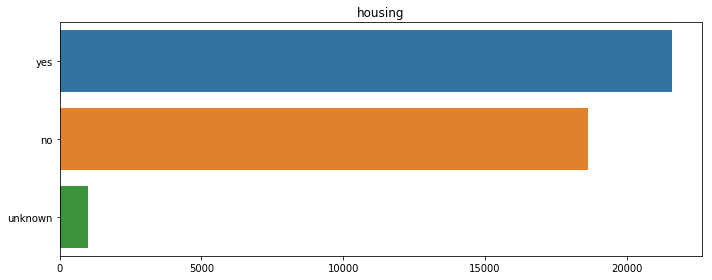

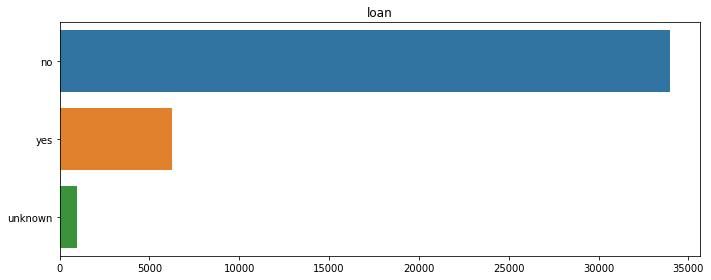

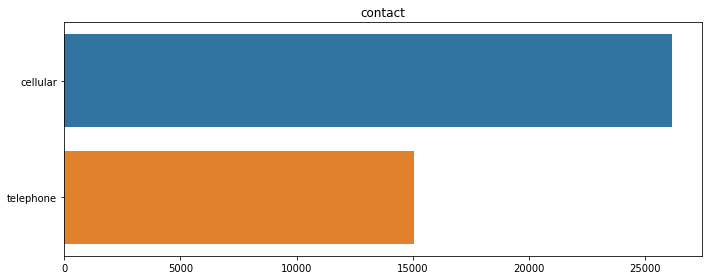

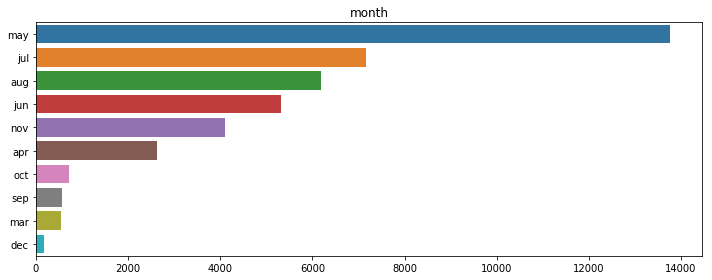

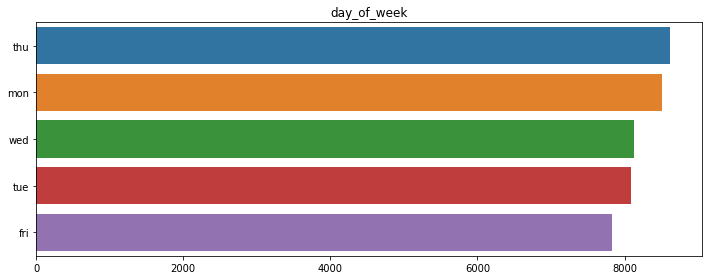

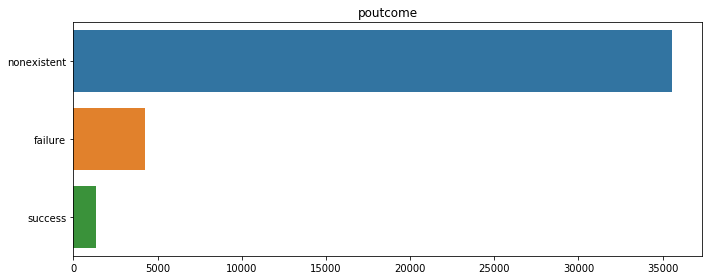

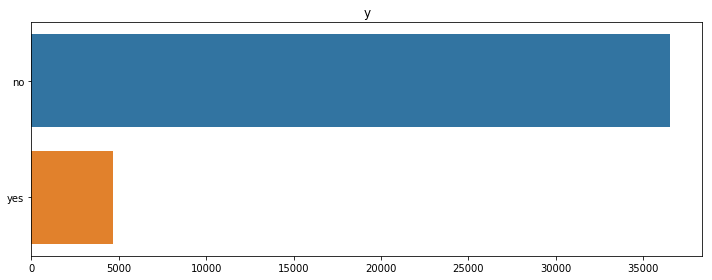

In [90]:
import seaborn as seas
%matplotlib inline
import matplotlib.pyplot as plt
categorical_columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for col in categorical_columns:
    plt.figure(figsize=(10,4))
    seas.barplot(df_full[col].value_counts().values, df_full[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

# Discussion
The following graphs were created using barplot from seaborn. 
Each categorical attribute along with the count of each category is represented using bar graph.The whole idea behind doing this is to visualize all the categorical attributes and see how many unknown values are there in each attribute. The inference from this section will be used in section 4 where we try to imputate the data to replace the unknown values.

# Section 3a- Frequency analysis
Here I am trying to analyse how each category will affect the final target outcome of our model.Fequency count is calculated for all categorical attributes both negative and positive to see its affect on the target value. Positive frequence obvioulsy means that particular category favour the final target outcome to be positive and vice versa.

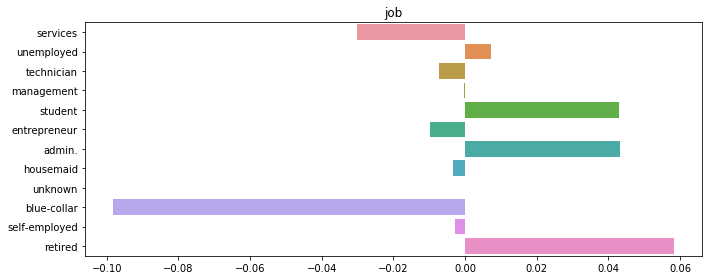

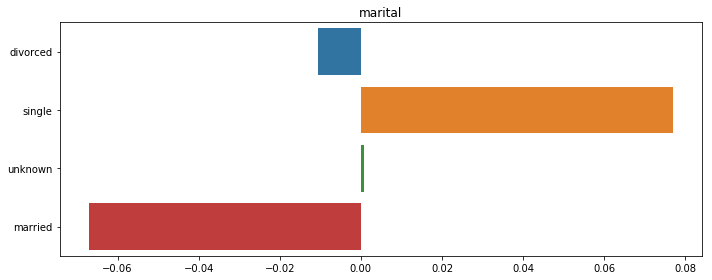

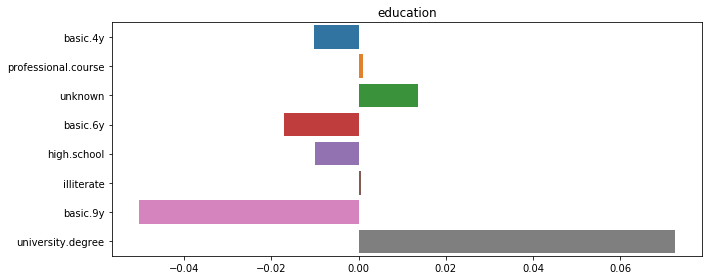

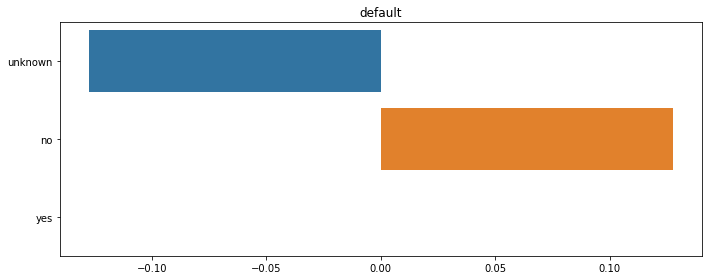

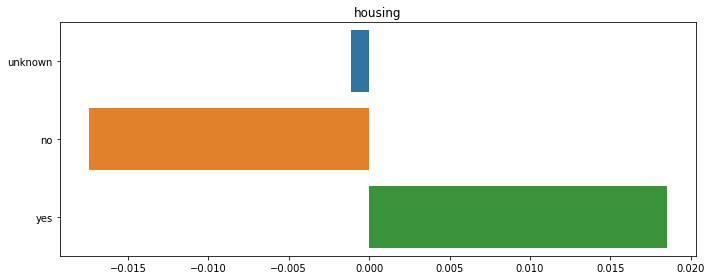

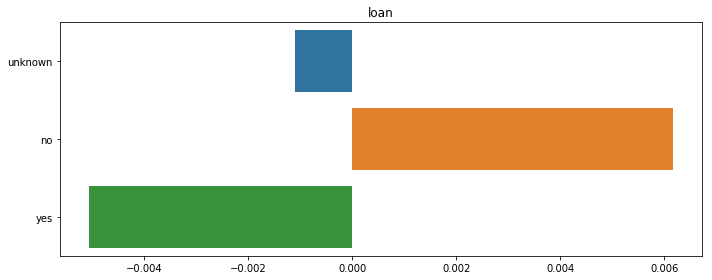

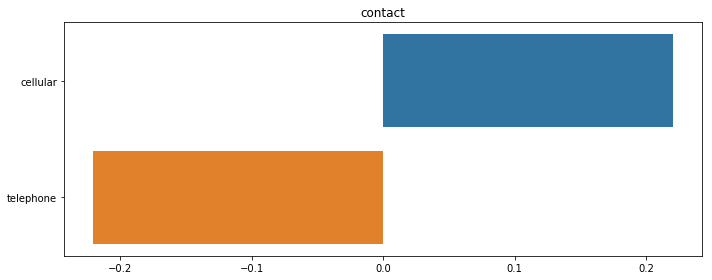

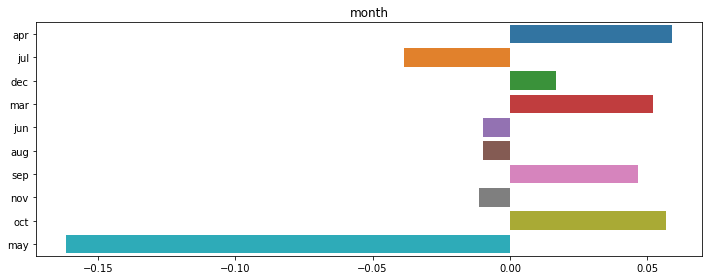

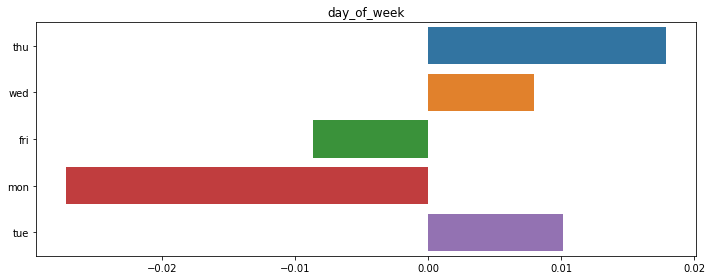

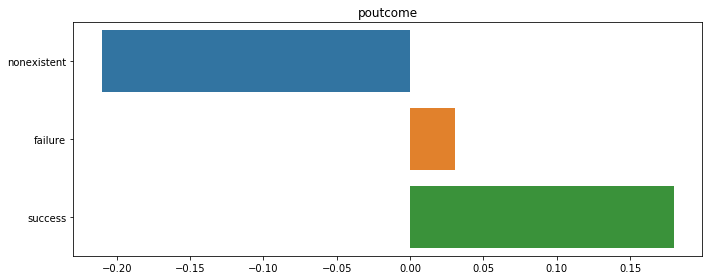

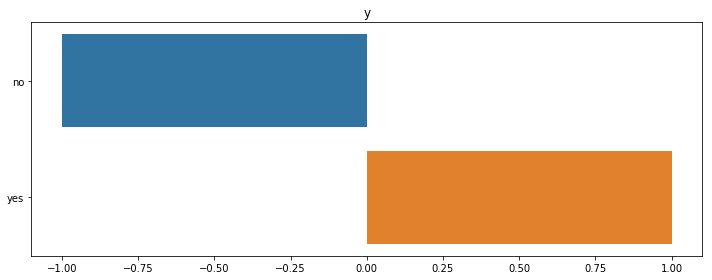

In [91]:
categorical_columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for col in categorical_columns:
    plt.figure(figsize=(10,4))
    # Calculating positive and negative counts for each category w.r.t the outcome required(yes/no)
    positive_count=df_full.loc[df_full.y.values=='yes',col].value_counts()
    negative_count=df_full.loc[df_full.y.values=='no',col].value_counts()
#     print(positive_count)
#     print(negative_count)
    
    Total_count=list(set(list(positive_count.index) + list(negative_count.index)))
#     print(Total_count)
    
    # Calculating frequency of how often each outcome occured
    positive_freq=(df_full.y.values=='yes').sum()
    negative_freq=(df_full.y.values=='no').sum()
#     print(positive_freq)

    #Storing count to dict
    positive_count=positive_count.to_dict()
    negative_count=negative_count.to_dict()
    
    Total_index=list(Total_count)
#     print(Total_index)
    Total_count=[positive_count.get(a,0)/ positive_freq-negative_count.get(a,0)/negative_freq for a in Total_count]
    seas.barplot(Total_count,Total_index)
    plt.title(col)
    plt.tight_layout()

# Discussion 3a
From the above graphs we can see how the positive and negative frequencies affect the target outcome y. Also, we can see the count of umknown in each attibute. The whole idea is to get an insight on the count of unknowns so that we can later deal with it.
We can drop that particular attribute if its not important when it comes to training the model which will affect the final model being built or we can imputate the data by using other indepedent variables to guess the missing value. This might not solve the whole missing data issue on the whole but will give us a realistic chance to design a better prediction model.

Graphy study- From the above graphs we now need to find how many attributes have more count of unknowns. We can see that there are 6 attributes which have unknown in them namely- job, maritial, housing, default, education and loan.
From the dataset description , we know that the default attribute is showing the credit in default (yes/no/unknown). This is actually a personal choice of the customer whether to provide the value or not hence the unknown value in this case is a separate issue. 
In the next section we deal with how to replace these unknown values.

# Section 4- Imputation of data

In [92]:
unknown_categorical_col=['job','education','housing','loan','marital']
# Job and Education is used to infer missing data
def imp_cross(df_full,c1,c2):
    J=list(df_full[c1].unique())
    E=list(df_full[c2].unique())
    df=[]
    for e in E:
        dfE=df_full[df_full[c2]==e]
        dfJ=dfE.groupby(c1).count()[c2]
        df.append(dfJ)
    p=pd.concat(df,axis=1)
    p.columns=E
    p=p.fillna(0)
    return p

In [93]:
imp_cross(df_full,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [94]:
df_full['job'][df_full['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

# Discussion

#### Inferring education from jobs-
1. People with university degree usually have the admin or management job.
2. Similarly when education = high school, job = service. and so on
Thus, I made sure that whatever corelations I get from the above cross tabulation, it makes sense in the real world. Therefore, wherever there is unknown for jobs with education as university degree, I have changed it to management etc.

#### Inferring jobs from education-
If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

#### Inferring jobs from age-
As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.


In [95]:
# Replacing unknown in jobs with education corelation
df_full.loc[(df_full['age']>60) & (df_full['job']=='unknown'), 'job'] = 'retired'

df_full.loc[(df_full['education']=='unknown') & (df_full['job']=='management'), 'education'] = 'university.degree'
df_full.loc[(df_full['education']=='unknown') & (df_full['job']=='services'), 'education'] = 'high.school'
df_full.loc[(df_full['education']=='unknown') & (df_full['job']=='housemaid'), 'education'] = 'basic.4y'
df_full.loc[(df_full['job'] == 'unknown') & (df_full['education']=='basic.4y'), 'job'] = 'blue-collar'
df_full.loc[(df_full['job'] == 'unknown') & (df_full['education']=='basic.6y'), 'job'] = 'blue-collar'
df_full.loc[(df_full['job'] == 'unknown') & (df_full['education']=='basic.9y'), 'job'] = 'blue-collar'
df_full.loc[(df_full['job']=='unknown') & (df_full['education']=='professional.course'), 'job'] = 'technician'

In [96]:
imp_cross(df_full,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


#### Discussion-
From the above tabulation we can see that the unknown count has gone down significantly.

In [97]:
jobhousing=imp_cross(df_full,'job','housing')
jobloan=imp_cross(df_full,'job','loan')

#### Imputations for house and loan-
I am again using cross-tabulation method here.'house','job' and  'loan','job.' are used. My hypothesis is that housing loan(Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable. 

In [98]:
# Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature
def predict_housing(df_full,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df_full[np.logical_and(np.array(df_full['housing']=='unknown'),np.array(df_full['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df_full.loc[ind1,"housing"]='no'
        df_full.loc[ind2,"housing"]='yes'
    return df_full

In [99]:
# Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature
def predict_loan(df_full,jobloan):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df_full[np.logical_and(np.array(df_full['loan']=='unknown'),np.array(df_full['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df_full.loc[ind1,"loan"]='no'
        df_full.loc[ind2,"loan"]='yes'
    return df_full

In [100]:
df_full=predict_housing(df_full,jobhousing)
df_full=predict_loan(df_full,jobloan)

In [101]:
display(df_full.head(10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Discussion
From the above dataframe we can see that I have taken care of unknown values that were present in categorical attributes using Imputation. Now lets look at the numeric ones.

In [102]:
numeric_columns=['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_full[numeric_columns].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Description
The following numeric attributes goes as follows-
1. Age- gives the age of the customer
2. campaign- shows last contact performed for the client
3. pdays- no of days when the client was last contacted. 999 is for no contact
4. emp.var.rate- employee variation rate
5. cons.price.idx- consumer price index
6. cons.conf.idx- consumer confidence index
7. euribor3m- euribor 3 month rate
8. nr.employed-no of employees

We know that Nan or unknown is shown using 999. Also, we can see that 999 is only shown in pdays and no other column.

## Missing value analysis in pdays

In [103]:
def gethistogram(df_full,feature):
    plt.hist(df_full[feature])

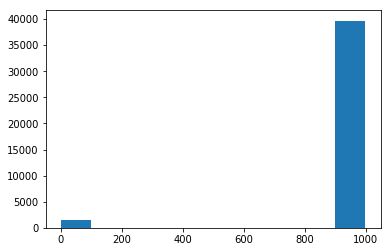

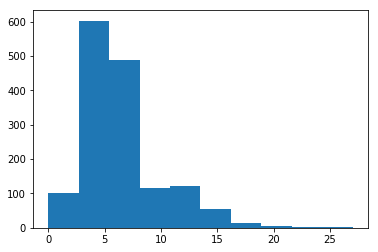

In [104]:
gethistogram(df_full,'pdays')
plt.show()

plt.hist(df_full.loc[df_full.pdays!=999,'pdays'])
plt.show()

### Discussion
From the above graphs it is not clear enough as to how the values are in pdays. Hence, I will use cross-tab of pandas. It computes a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

In [105]:
pd.crosstab(df_full['pdays'],df_full['poutcome'], values=df_full['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


### Discussion
From crosstab we can see that the majority of missing values are in pdays. It usually exists when the poutcome is nonexistent. This leads to one conclusion that the customer was never contacted which resulted in pdays having 999 or unknown values. To deal with this issue, I will noe drop the pdays column and instead add three more categorical columns which will be based on the count which will be calculated based on a threshold.

In [106]:
#Adding new categorical variables to our dataframe.
df_full['pdays_missing'] = 0
df_full['pdays_less_5'] = 0
df_full['pdays_greater_15'] = 0
df_full['pdays_bet_5_15'] = 0
df_full['pdays_missing'][df_full['pdays']==999] = 1
df_full['pdays_less_5'][df_full['pdays']<5] = 1
df_full['pdays_greater_15'][(df_full['pdays']>15) & (df_full['pdays']<999)] = 1
df_full['pdays_bet_5_15'][(df_full['pdays']>=5)&(df_full['pdays']<=15)]= 1
df_full_dropped_pdays = df_full.drop('pdays', axis=1);
df_full_with_dummies=pd.get_dummies(df_full_dropped_pdays)

In [107]:
def dropfeature(df_full,f):
    """Drops one of the dummy variables."""
    df_full=df_full.drop(f,axis=1)
    return df_full

In [108]:
features_dropped = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown','housing_unknown','loan_unknown', 'pdays_less_5']
df_full_clean = dropfeature(df_full_with_dummies, features_dropped)

# Section 5- Building Models
In this section we will deal with building different classification models to see which one works well and why.

In [109]:
# Train-test split 80:20
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_full_clean, train_size=0.8, random_state=5)
print('Original:', (df_full_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())


Original: 0.112654171118 Train: 0.110682852807 Test: 0.120538965768


In [110]:
train, test = train_test_split(df_full_clean, train_size=0.8, stratify=df_full_clean.y_yes.values, random_state=5)
print('Original:', (df_full_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())

Original: 0.112654171118 Train: 0.112655538695 Test: 0.112648701141


# Model 1- Logistic Regression
Here I am trying to build a LR model. The evaluation metric used will be ROC and AUC. From the above inference, we know that the final class which has 0 or 1 as the output is heavily imbalanced. Hence, using accuracy as the evaluation metric wouldnt really work well. Thats why I decided to use AUC and ROC.

In [84]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def LRmodel(train , validate , c, l_1 = False):
    '''Fits the Logistic Regression Model on the training data set and calculates evaluation metrics on the validation set
    with the regularization constant C'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
    train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
    validate_std = scaler.transform(validate[X])
    xtrain = train_std
    ytrain = train[Y]
    xval = validate_std
    yval = validate[Y]
    if l_1:
        logreg = LogisticRegression(C = c, penalty= 'l1') #Apply logistic regression on L1 penalty
    else:
        logreg = LogisticRegression(C=c)
    logreg.fit(xtrain,ytrain)
    pred_proba_val = logreg.predict_proba(xval)[:,1]
    auc = metrics.roc_auc_score(yval, pred_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(yval, pred_proba_val)
    accuracy = metrics.accuracy_score(yval, logreg.predict(xval))
    return auc,logreg.coef_, tpr, fpr, threshold, accuracy

### Hyper-paramater tuning and CV for Logistic Regression Model:
Here I am tuning LR model with cross-validation. Tuning is basically done to decide the optimal regularization parameter for Logistic Regression.

In [82]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldlr(dataset , k , cs, l1_penalty = False):
    '''Performs kfold cross validation for the dataset and also searches for the optimal regularixation parameter '''
    aucs = {}
    kf = KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf: #For loop to extract and append AUC values to array from training data
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for c in cs:
            auc, f_imp, tpr, fpr, threshold, accuracy = LRmodel(cv_train,cv_validate,c, l_1 = l1_penalty)
            if c in aucs:
                aucs[c].append(auc)
            else:
                aucs[c]=[]
                aucs[c].append(auc)
    return aucs

In [83]:
# Regularization Parameter value is chosen
cs = np.logspace(-4,5,10)
aucs_l2=kfoldlr(train , 5 , cs)
aucs_l1=kfoldlr(train , 5 , cs, l1_penalty= True)

#### Function to calculate auc for cross validated samples and also to calculate the value of Regularization Parameter


In [80]:
def getmeanauc(aucs,model):
    #Initialize empty array to hold mean AUC values.
    meanauc = []
    maxmean = 0 #Initial value for maximum mean AUC
    models_with_1_param = ['Logistic_Regression' , 'Ada_Boost']
    models_with_2_params = ['Decision_Tree' , 'Random_Forest', 'Grad_Boost']
    for c in aucs: #For loop to append AUC value to meanauc array.
        meanauc.append(np.mean(aucs[c]))
        if maxmean < np.mean(aucs[c]):
            maxmean = np.mean(aucs[c]) #Adjust value of maxmean
            cval = c
    if model in models_with_1_param:
        print("C value for max auc is: ",cval)
        print("Max Mean Auc corresponding to the optimal value of C = ", maxmean)
        return meanauc,cval
    if model in models_with_2_params:
        listSL=cval.split('L')
        splitval=int(listSL[0]) #Stores minimum split value for max AUC
        leafval=int(listSL[1]) #Stores minimum leaf value for max AUC
        print("min_sample_split value for max auc is:",splitval)
        print("min_sample_leaf value for max auc is:",leafval)
        print("Max mean AUC corresponding to optimal leaf and split value = ",maxmean)
        return meanauc,splitval,leafval

In [81]:
means_l2,cval_l2 = getmeanauc(aucs_l2,'Logistic_Regression')
means_l1,cval_l1 = getmeanauc(aucs_l1,'Logistic_Regression')

C value for max auc is:  0.1
Max Mean Auc corresponding to the optimal value of C =  0.790314608596
C value for max auc is:  0.1
Max Mean Auc corresponding to the optimal value of C =  0.790509737993


#### Inference
From the above results obtained, we can see that L1 regularization works better when compared to L2 for Logistic Regression model.

### Function to plot mean AUC values vs c values 

In [78]:
def plot_mean_auc_LR(aucs,cs, label):
    '''Plots different values of mean auc versus the hyperparameter C'''
    plt.plot(np.log10(cs),aucs, label = label )
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean AUC")
    plt.legend()

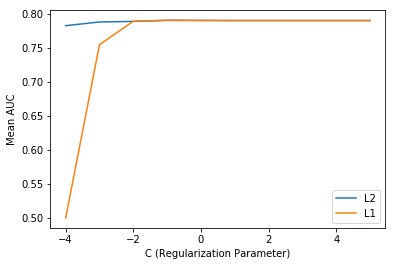

In [79]:
plot_mean_auc_LR(means_l2,cs, label = 'L2')
plot_mean_auc_LR(means_l1,cs, label = 'L1')

# Model 2- Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#  Decision Tree model to fit the train set to decision tree and predict AUC on test/validation set
def DecisionTreemodel(train,validation,leaf=1,split=2):
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X] 
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]

    #Runs sklearn's decision tree algorithm on the training data with min leaf size 1 and split size 2
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,min_samples_split=split) 
    #Train the model
    dt.fit(xtrain,ytrain)
    predict_proba_val=dt.predict_proba(xval)[:,1] #Predict class probabilities of input validation data
    auc=metrics.roc_auc_score(yval,predict_proba_val) #Compute ROC AUC from prediction scores
    fpr,tpr,threshold=metrics.roc_curve(yval,predict_proba_val) #Compute ROC
    accuracy=metrics.accuracy_score(yval,dt.predict(xval)) #Compute subset accuracy classification score
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    imp=dt.feature_importances_ 
    return auc,imp,tpr,fpr,threshold,accuracy

#### hyperparameter tuning and cross validation of DT model

In [75]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing
# K-fold validation function for Decision tree and Random Forest. K=5, hence input data set is divided 
# into 5 datasets out of which 4 of them will be used to fit model and one to validate the model in each iteration 
def kfoldDTRF(dataset, k,split,leaf,model):
    aucs={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf: 
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for sp in split:
            for lf in leaf:
                if model=='DT':
                    #Run decision tree function above based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=DecisionTreemodel(cv_train,cv_validate,lf,sp)
                if model=='RF':
                    #Run random forest function below based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=randomforrest(cv_train,cv_validate,lf,sp)
                
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(core)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(core)
    return aucs

In [36]:
split = np.geomspace(10,2000,num=10,dtype=int)
leaf = np.geomspace(5,200,num=10,dtype=int)
aucsdt=kfoldDTRF(train,5,split,leaf,'DT')

min_sample_split value for max auc is: 1110
min_sample_leaf value for max auc is: 132
Max mean AUC corresponding to optimal leaf and split value =  0.791884683783


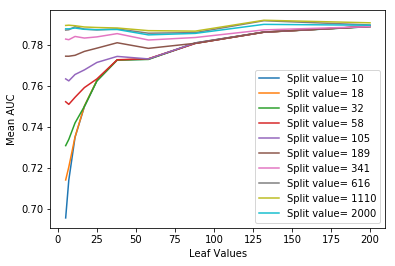

In [76]:
meanauc,splitval,leafval=getmeanauc(aucsdt,'Decision_Tree')
def plotAUCDTRF(aucs,leafs,splits):
    '''Plots AUC for each value of Leaf and Split combination'''
    for i in range(len(splits)):
        plt.plot(leafs,aucs[len(leafs)*i:len(leafs)*i+len(leafs)], label = 'Split value= ' + str(splits[i]))
    plt.legend()
    plt.xlabel('Leaf Values')
    plt.ylabel('Mean AUC')
plotAUCDTRF(meanauc,leaf,split)

### Discussion
It looks like the mean AUC for DT is slightly better than that of LR.
79.22(DT) Vs 79.05(LR)

# Model 3- Random Forest


In [38]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest model to fit the training set to random forest and compute AUC on test/validation set
def randomforrest(train,validation,leaf=1,split=2):
    X=list(train.columns) #Provides indices to split data in train/test sets
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X]
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    random_forest = RandomForestClassifier(n_estimators=128,min_samples_split=split,min_samples_leaf=leaf)
    random_forest.fit(xtrain,ytrain)
    
    #Predict target values
    Y_pred = random_forest.predict(xval)
    
    #Predict class probabilities of input validation data
    proba_val=random_forest.predict_proba(xval)[:,1]
    
    #Computing ROC
    fpr, tpr, thresholds=metrics.roc_curve(yval,proba_val)
    
    #Compute ROC AUC scores from prediction values
    score=metrics.roc_auc_score(yval,proba_val)
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    importance=random_forest.feature_importances_
    accuracy=metrics.accuracy_score(yval,random_forest.predict(xval))
    return score,importance,tpr,fpr,thresholds,accuracy

## Cross validation and hyper parameter tuning for Random Forest

min_sample_split_value and min_sample_leaf are hyper parameters for random forest indicating minimum split size and minimum leaf size. The range of value taken for split is [10,2000] and the range for leaf is [5,200]. Hence, there are 100 combination of split and leaf values. For each of these combinations, the AUC is calculated.

In [39]:
RF_split = np.geomspace(10,2000,num=10,dtype=int)
RF_leaf = np.geomspace(5,200,num=10,dtype=int)
RF_auc=kfoldDTRF(train,5,RF_split,RF_leaf,'RF')

min_sample_split value for max auc is: 341
min_sample_leaf value for max auc is: 11
Max mean AUC corresponding to optimal leaf and split value =  0.798742182698


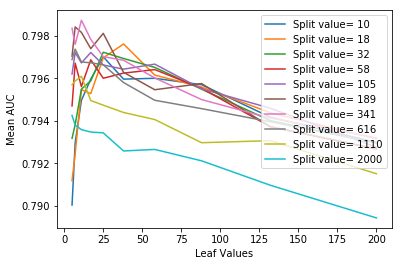

In [40]:
RF_aucs,RF_splitval,RF_leafval=getmeanauc(RF_auc,'Random_Forest')
plotAUCDTRF(RF_aucs,RF_leaf,RF_split)

### Inference-
From the above AUC score we can see that RF is giving a score of 79.8% which is much better than DT's 79.22 and LR's 79.05

# Model 4- Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
# Function for gradient boosting to minimize loss via weak learners
def GBoosting(train,validation,leaf=1,split=2):
    X=list(train.columns)
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X]
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    GB = GradientBoostingClassifier(min_samples_split=split,min_samples_leaf=leaf)
    GB.fit(xtrain,ytrain)
    
    #Predict target values
    Y_pred = GB.predict(xval)
    
    #Predict class probabilities of input validation data
    gbplot=GB.predict_proba(xval)
    gbpre=gbplot[:,1]
    
    #Compute ROC
    gbfpr, gbtpr, gbthresholds=metrics.roc_curve(yval,gbpre)
    
    #Compute ROC AUC scores from prediction values
    gbscore=metrics.roc_auc_score(yval,gbpre)
    gbaccuracy=metrics.accuracy_score(yval,GB.predict(xval))
    
    #Feature importances. The higher the score, the more important the feature. 
    importance=GB.feature_importances_
    
    return gbscore,importance,gbtpr,gbfpr,gbthresholds,gbaccuracy

### Cross Validation and Hyper Paremeter Tuning for Gradient Boosting

In [72]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing
def kfoldGB(dataset, k,split,leaf):
    aucs={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for sp in split:
        for lf in leaf:
            for train_idx, vali_idx in kf:
                cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
                #Run Gradient Boosted Trees function defined above based on user input
                gbscore,importance,gbtpr,gbfpr,gbthresholds,gbaccuracy= GBoosting(cv_train,cv_validate,lf,sp)
                
                #Storing the AUC scores in the aucs dictionary for all split values (sp) and leaf values (lf)
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(gbscore)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(gbscore)
    return aucs

Gradient Boosting also takes split and leaf as hyper parameters. I am taking the range (10,2000) for split values and the range (5,2000) for leaf values to see which combination of gives the optimal AUC when Gradient Boosting is used. 

In [43]:
gbsplit = np.geomspace(10,1500, num=8, dtype=int)
gbleaf = np.geomspace(5,750, num=6, dtype=int)
gbaucs=kfoldGB(train,5,gbsplit,gbleaf)

min_sample_split value for max auc is: 175
min_sample_leaf value for max auc is: 37
Max mean AUC corresponding to optimal leaf and split value =  0.800766877355


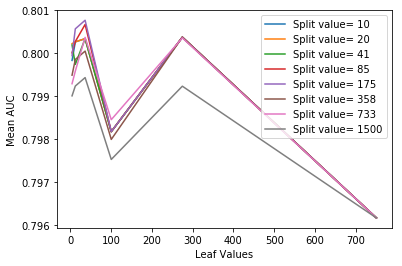

In [73]:
gbauc,gbsplitval,gbleafval=getmeanauc(gbaucs,'Grad_Boost')
plotAUCDTRF(gbauc,gbleaf,gbsplit)

### Inference
From the above AUC score we can see that GB is giving a score of 80.7% which is much better than RF's 79.8%, DT's 79.22 and LR's 79.05

# Model 5- Ada Boosting

In [68]:
from sklearn.ensemble import AdaBoostClassifier
def adaboost(settrain,settest, nestimator = 100):
    X=list(settrain.columns)
    Y='y_yes'
    X.remove('y_yes')
    xtrain=settrain[X]
    ytrain=settrain[Y]
    xtest=settest[X]
    ytest=settest[Y]
    #Instantiate a Decision Stump
    dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
    
    #Instantitate an AdaBoostClassifier using the decision stump defined above
    ad = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=nestimator)
    
    #fit the AdaBoostClassifier on the training data
    ad.fit(xtrain,ytrain)
    
    #Predict the Y values for the test/validation data
    Y_pred = ad.predict(xtest)
    
    #Predict class probabilities of input validation data
    adplot=ad.predict_proba(xtest)
    
    
    adpre=adplot[:,1]
    
    #Computation to compute AUC score
    adfpr, adtpr, adthresholds=metrics.roc_curve(ytest,adpre)
    adscore=metrics.roc_auc_score(ytest,adpre)
    
    #Feature importances. The higher the score, the more important the feature.
    ii=ad.feature_importances_
    return adscore,ii

### Cross Validation and Hyper Parameter Tuning for Adaboost Model

In [69]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing
def kfoldadaboost(dataset, k, estimators):
    aucs ={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for e in estimators:
        for train_idx, vali_idx in kf:
            cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
            
            #Run AdaBoostClassifier function defined above based on user input
            core,f= adaboost(cv_train,cv_validate, nestimator = e) 
            
            #storing the auc Scores in the aucs dictionary for all the estimator values.
            aucs[e] = []
            aucs[e].append(core)
    return aucs

For Adaboost, n_estimators is the hyper parameter which corresponds to maximum number of estimators. I am taking the range of values (50,2000) to see which of these values gives highest AUC when Adaboost is used.

In [47]:
estimators = np.array([50,100,400,600,1000,2000])
adaauc = kfoldadaboost(train, 5, estimators)

In [70]:
def plot_mean_auc_Ada_Boost(aucs, estimators, label):
    '''Plots different values of mean auc versus the Estimators for AdaBoosting'''
    plt.plot(estimators,aucs, label = label )
    plt.xlabel("Estimators")
    plt.ylabel("Mean AUC")
    plt.legend()

C value for max auc is:  600
Max Mean Auc corresponding to the optimal value of C =  0.816004248041


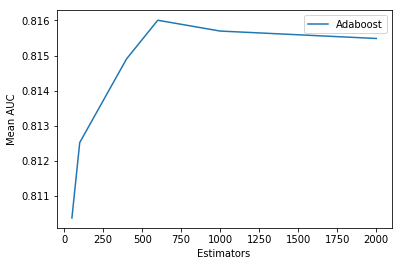

In [74]:
adaaucs,adac=getmeanauc(adaauc,'Ada_Boost')
plot_mean_auc_Ada_Boost(adaaucs,estimators,'Adaboost')

### Inference
From the above AUC score we can see that Ada boosting is performing the best out of all the models giving an accuracy of 81.6%.

# Analyses
Here, I will try to find out the important features and then use that along with ada boosting model to finally make the prediction on the test set.

In [64]:
# Plots feature importance in a sorted order and shows the most significant variables at the top
import seaborn as sns
def plotfeatureimportances(train, importance):
    X = list(train.columns)
    X.remove('y_yes')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')

In [65]:
adaauc_test,adafea=adaboost(train,test,adac)

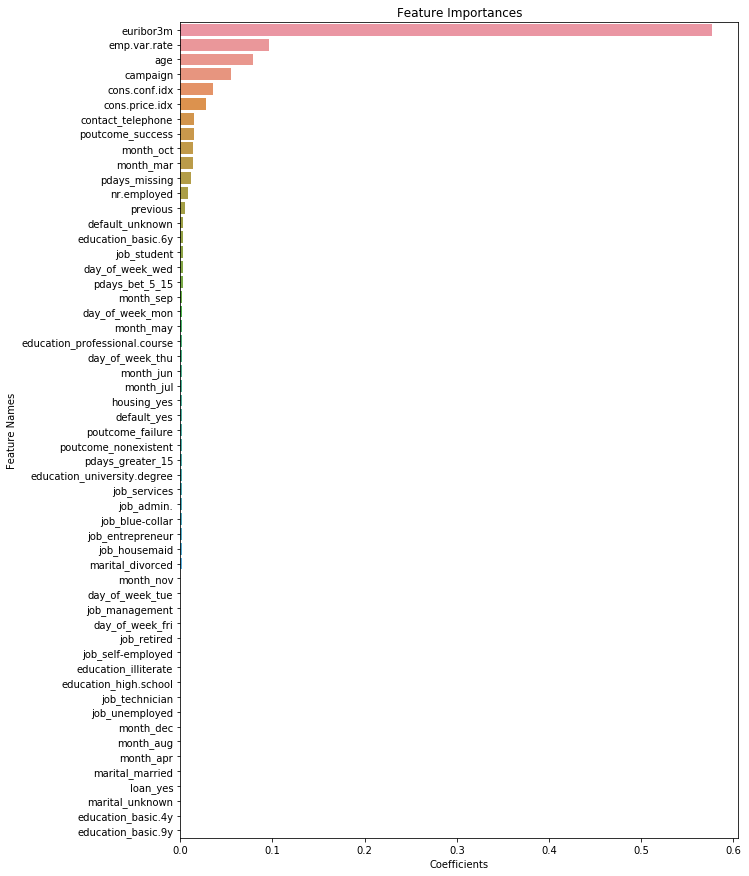

In [66]:
plotfeatureimportances(train,adafea)

In [67]:
print('Final Test AUC Score = ',adaauc_test)

Final Test AUC Score =  0.804113622694


# Final Result:

From the above Feature Importance chart, we see that-
1. Europe's Libor rate ('euribor3m') 
2. client age ('age') 
3. employment variability index ('emp.var.rate') 
4. number of client contacts during the current marketing campaign ('campaign')
5. consumer price index ('cons.price.idx') 
6. consumer confidence index ('cons.price.idx') 
7. mode of contact via phone ('contact_telephone') 
are the important features that drive the decision of the customer to purchase the term deposit or not.

Also, test score is 80.4 which is almost similar to what we were getting with Ada boosting (81.6%)